In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

final_years = pd.read_csv('Data/tmdb_results_combined.csv.gz', low_memory = False)

pd.set_option('display.float_format', lambda x: '%.3f' % x) #avoid scientific notation

In [33]:
final_years.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2492 entries, 0 to 2491
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                2492 non-null   object 
 1   adult                  2490 non-null   float64
 2   backdrop_path          1290 non-null   object 
 3   belongs_to_collection  197 non-null    object 
 4   budget                 2490 non-null   float64
 5   genres                 2490 non-null   object 
 6   homepage               174 non-null    object 
 7   id                     2490 non-null   float64
 8   original_language      2490 non-null   object 
 9   original_title         2490 non-null   object 
 10  overview               2438 non-null   object 
 11  popularity             2490 non-null   float64
 12  poster_path            2195 non-null   object 
 13  production_companies   2490 non-null   object 
 14  production_countries   2490 non-null   object 
 15  rele

In [34]:
final_years.duplicated().sum()

1

In [35]:
final_years.drop_duplicates(inplace=True) #drop duplicates from the df

### Titles with financial information


In [36]:
(final_years[['revenue','budget']] > 0).sum()





revenue    433
budget     535
dtype: int64

In [37]:
#don't count null or 0 values in budget or revenue columns
final_years = final_years[final_years['budget'].notna()]
final_years = final_years[final_years['revenue'].notna()]
final_years = final_years[final_years['budget'] > 0]
final_years = final_years[final_years['revenue'] > 0]

### Titles per Certification


In [38]:
final_years['certification'].value_counts()



R        140
PG-13    117
PG        29
G         13
NR         6
Name: certification, dtype: int64

In [39]:
final_years = final_years[final_years.certification != 'Unrated']
final_years = final_years[final_years.certification != '-']

In [40]:
final_years['certification'].value_counts()


R        140
PG-13    117
PG        29
G         13
NR         6
Name: certification, dtype: int64

### Revenue by Certification


In [41]:
final_years.groupby('certification')['revenue'].mean()

certification
G       133216881.692
NR       23823316.000
PG      134613828.034
PG-13   110712060.256
R        53446539.321
Name: revenue, dtype: float64

C:\Users\svaze\anaconda3\envs\dojo-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Revenue by Certfication (x10^7)')

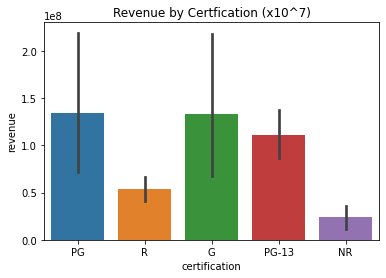

In [46]:
sns.barplot(final_years['certification'], final_years['revenue'])
plt.title('Revenue by Certfication (x10^7)')

### Budget by Certification


In [42]:
final_years.groupby('certification')['budget'].mean()

certification
G       44000000.000
NR      14783333.333
PG      53741379.621
PG-13   46806815.274
R       27502553.893
Name: budget, dtype: float64

C:\Users\svaze\anaconda3\envs\dojo-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Budget by Certfication (x10^7)')

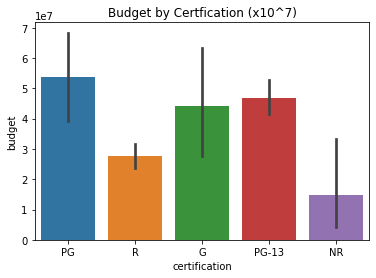

In [45]:
sns.barplot(final_years['certification'], final_years['budget'])
plt.title('Budget by Certfication (x10^7)')